In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

In [4]:
x, y = make_blobs(n_samples=100, n_features=2, random_state=1,
                  centers=3, cluster_std=3.0)

In [5]:
y[y == 0] = -1
y[y == 1] = 0
y[y == 2] = 1

In [121]:
def transform(value):
    if value == 0:
        return -1
    elif value == 1:
        return 0
    elif value == 2:
        return 1
        
transform_y = np.vectorize(transform)

new_y = transform_y(y)

In [5]:
print('max', np.max(x))
print('min', np.min(x))
print('mean', np.mean(x))

max 10.707255278279689
min -15.571658096993357
mean -4.034710655598525


In [6]:
from sklearn.neighbors import NearestNeighbors

k = 5

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(x)

NearestNeighbors()

In [7]:
distances, indices = neigh.kneighbors(x)

distances = np.sort(distances[:, k-1], axis=0)

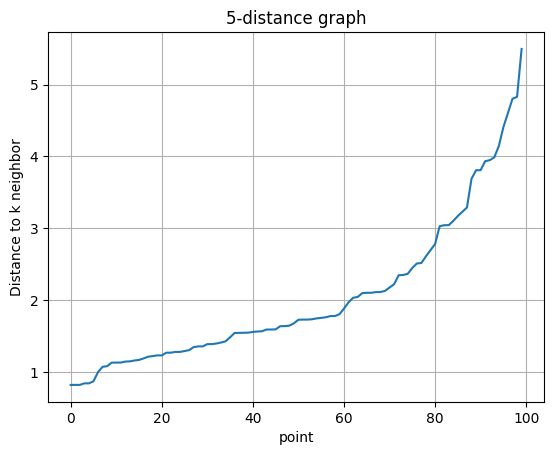

In [8]:
plt.plot(distances)
plt.grid(True)
plt.title(f"{k}-distance graph")
plt.xlabel('point')
plt.ylabel('Distance to k neighbor')
plt.show()

In [9]:
from sklearn.metrics.pairwise import pairwise_distances

# Вычисляем все попарные расстояния
distances_ = pairwise_distances(x)

# Среднее расстояние до ближайшего соседа
eps = np.mean(np.min(distances_ + np.eye(len(x)) * 1e6, axis=1))  # Исключаем 0 (дистанцию до себя)

print(f"Рекомендуемое начальное eps: {eps}")

Рекомендуемое начальное eps: 1.0703192580456262


In [10]:
for eps in np.arange(0.5, 3.5, 0.1):
    
    model_DBS = DBSCAN(eps=eps, min_samples=4)
    labels = model_DBS.fit_predict(x)
    
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps = {eps:.2f}: Кластеров = {n_clusters}, Шумовых точек = {n_noise}")

eps = 0.50: Кластеров = 0, Шумовых точек = 100
eps = 0.60: Кластеров = 0, Шумовых точек = 100
eps = 0.70: Кластеров = 1, Шумовых точек = 96
eps = 0.80: Кластеров = 4, Шумовых точек = 83
eps = 0.90: Кластеров = 3, Шумовых точек = 80
eps = 1.00: Кластеров = 5, Шумовых точек = 68
eps = 1.10: Кластеров = 6, Шумовых точек = 63
eps = 1.20: Кластеров = 5, Шумовых точек = 60
eps = 1.30: Кластеров = 7, Шумовых точек = 44
eps = 1.40: Кластеров = 8, Шумовых точек = 36
eps = 1.50: Кластеров = 4, Шумовых точек = 30
eps = 1.60: Кластеров = 4, Шумовых точек = 27
eps = 1.70: Кластеров = 4, Шумовых точек = 22
eps = 1.80: Кластеров = 4, Шумовых точек = 20
eps = 1.90: Кластеров = 4, Шумовых точек = 19
eps = 2.00: Кластеров = 3, Шумовых точек = 17
eps = 2.10: Кластеров = 2, Шумовых точек = 16
eps = 2.20: Кластеров = 2, Шумовых точек = 16
eps = 2.30: Кластеров = 2, Шумовых точек = 14
eps = 2.40: Кластеров = 2, Шумовых точек = 13
eps = 2.50: Кластеров = 2, Шумовых точек = 12
eps = 2.60: Кластеров = 2, Шумов

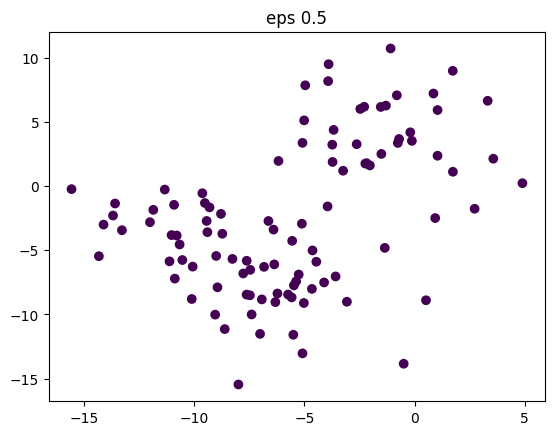

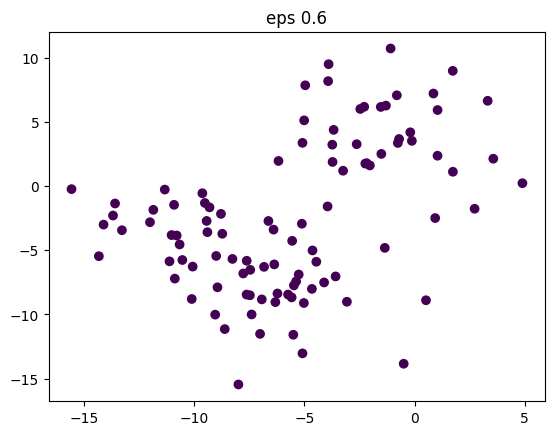

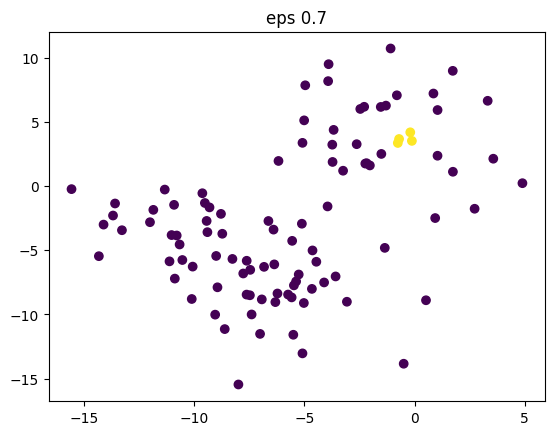

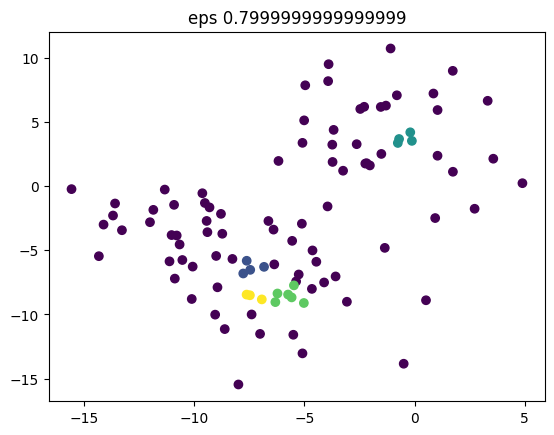

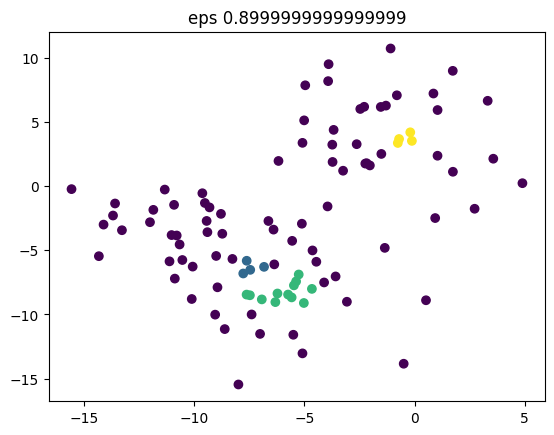

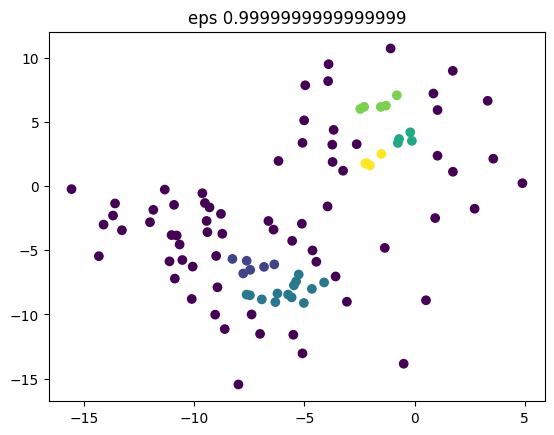

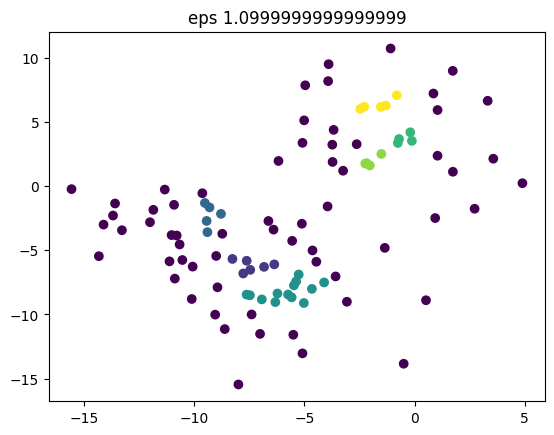

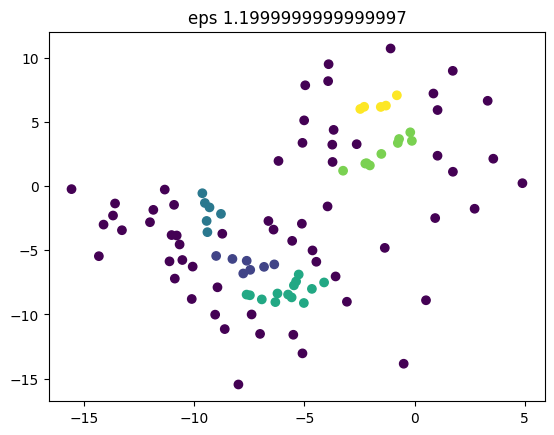

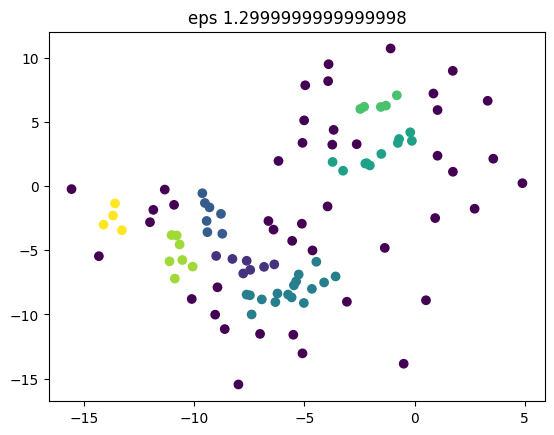

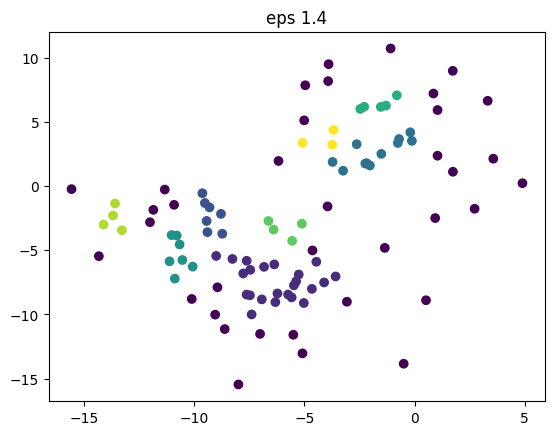

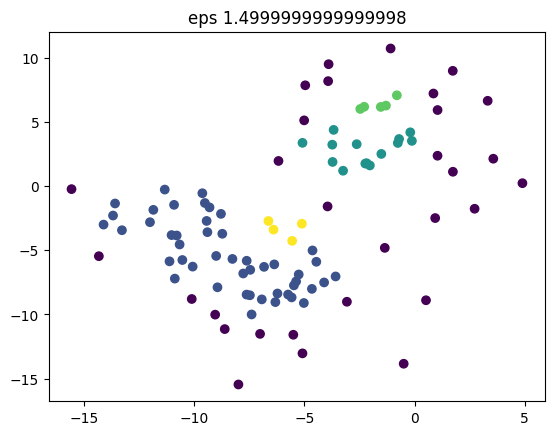

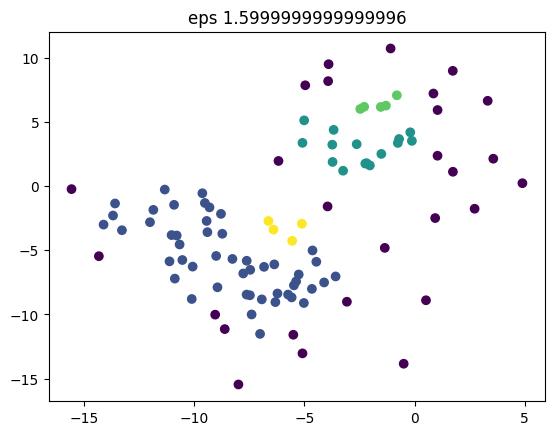

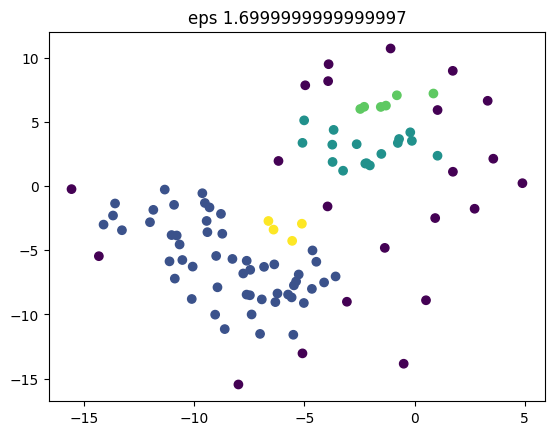

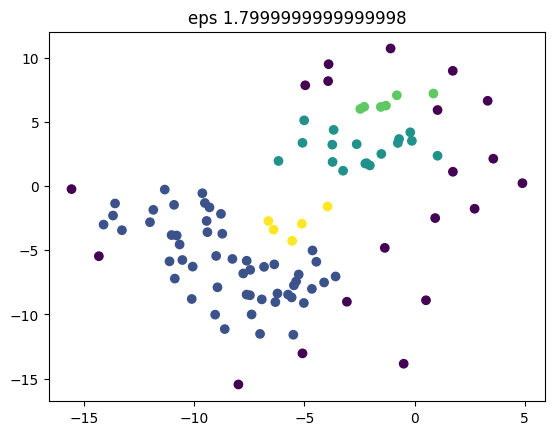

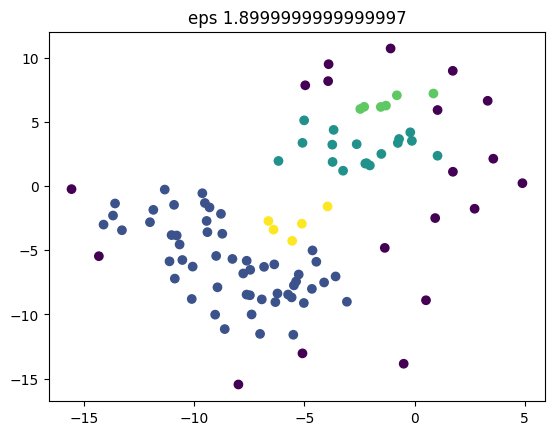

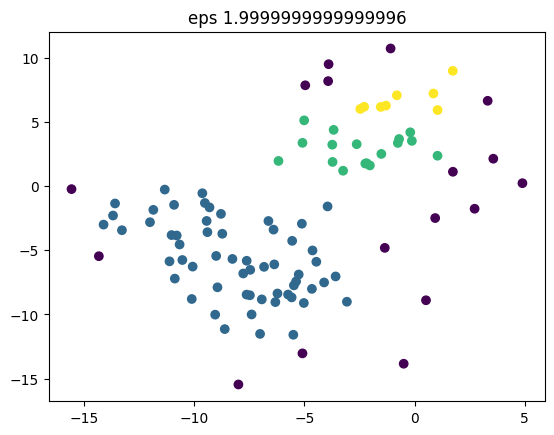

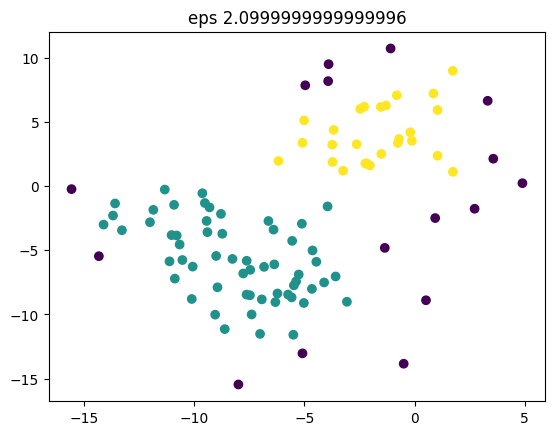

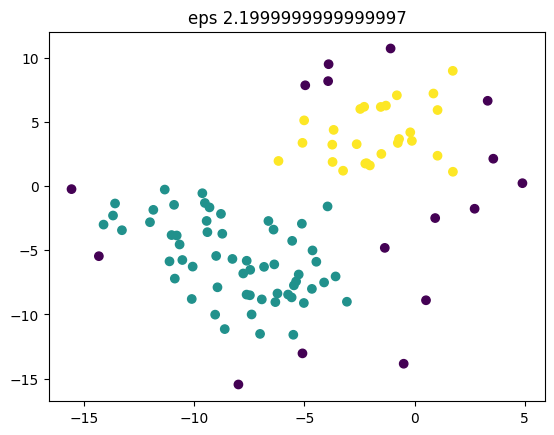

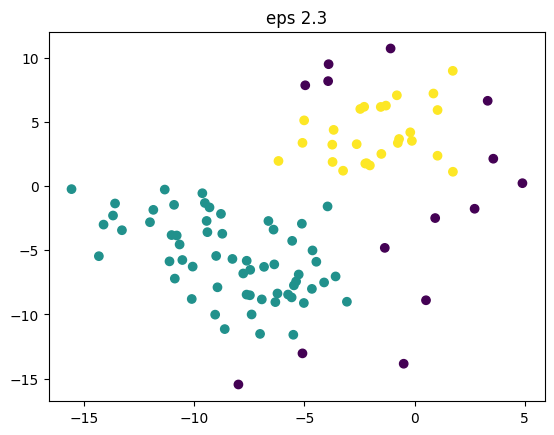

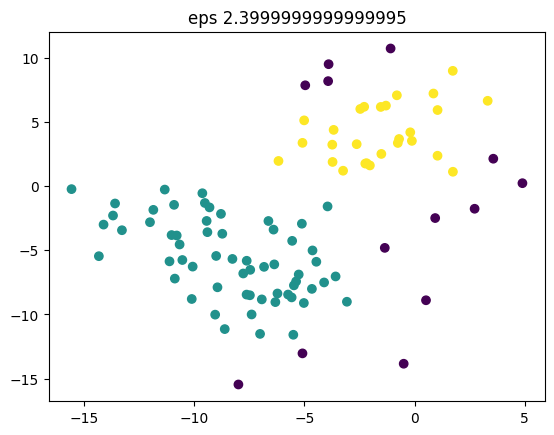

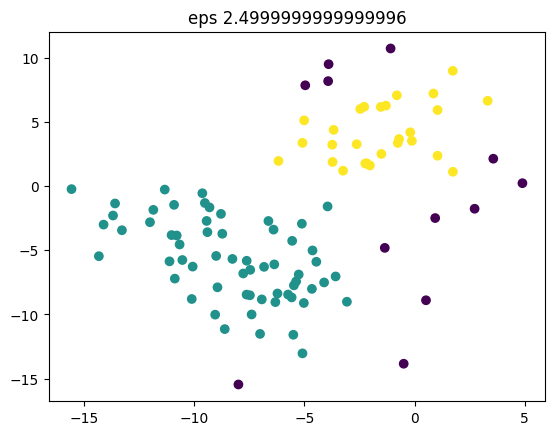

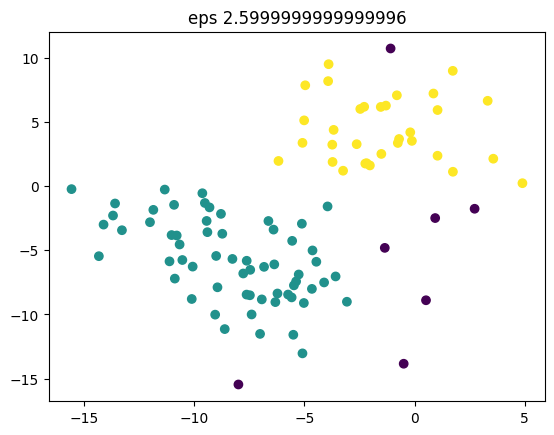

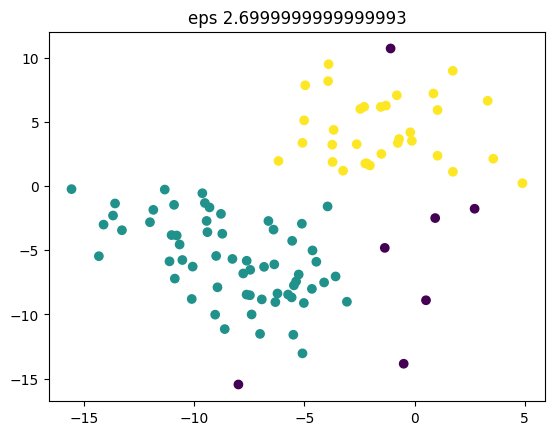

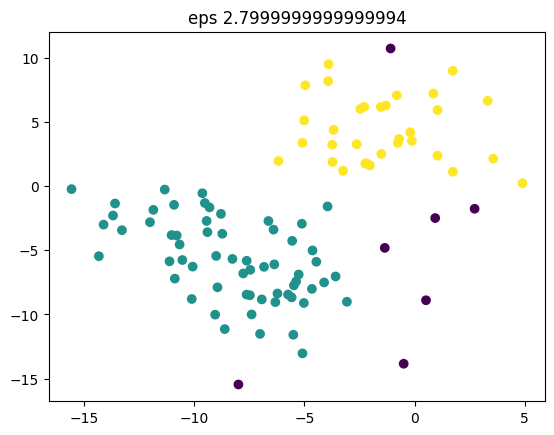

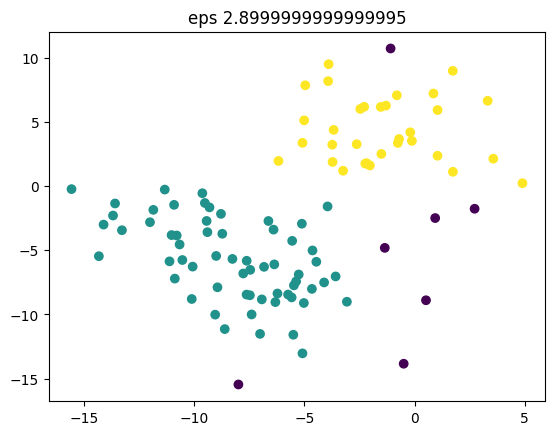

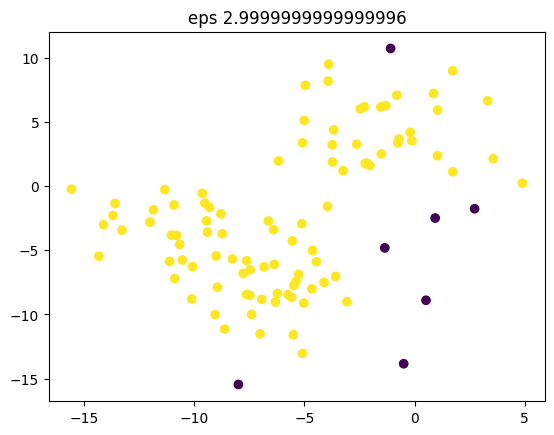

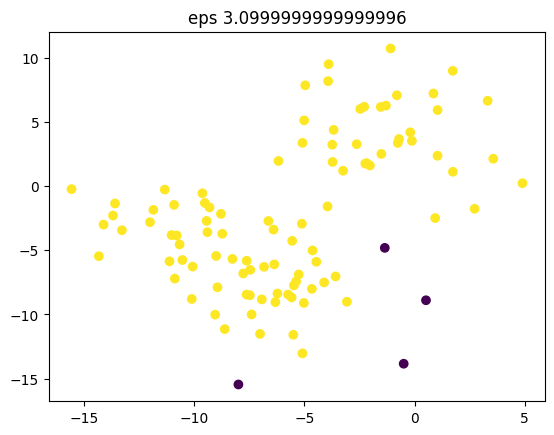

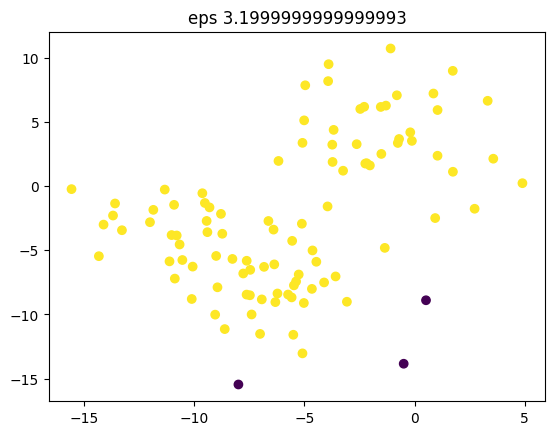

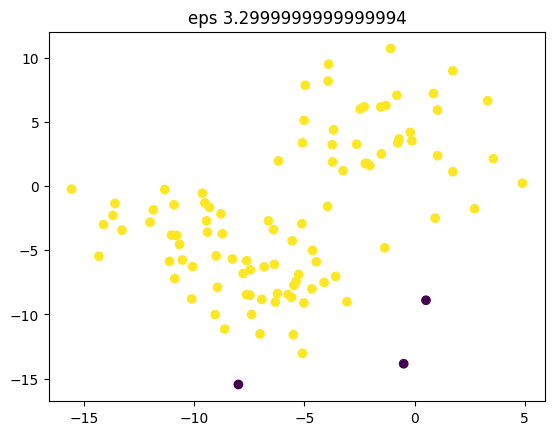

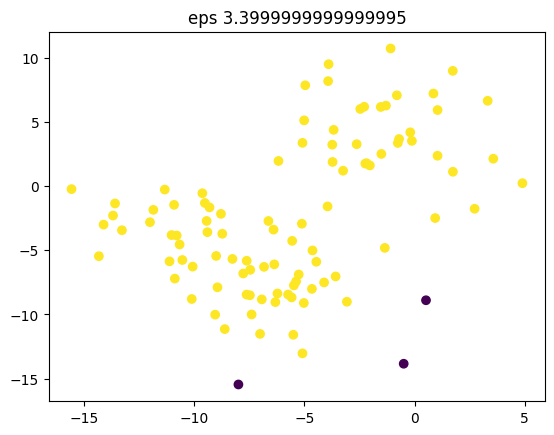

In [11]:
for eps in np.arange(0.5, 3.5, 0.1):
    
    model_DBS = DBSCAN(eps=eps, min_samples=4)
    labels = model_DBS.fit_predict(x)
    
    plt.scatter(x[:, 0], x[:, 1], c=labels)
    plt.title(f'eps {eps}')
    plt.show()

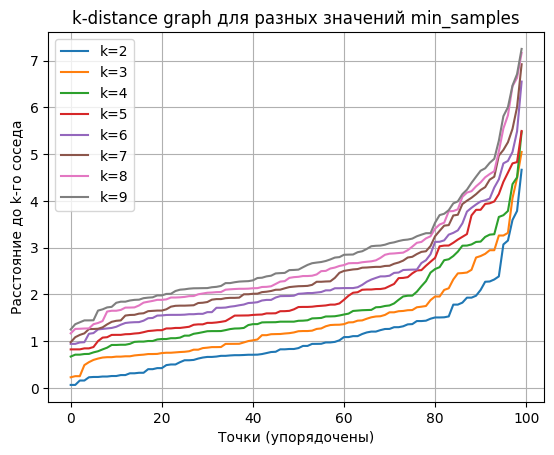

In [67]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


# Пробуем разные значения min_samples (k)
for k in range(2, 10):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(x)
    distances, indices = neigh.kneighbors(x)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances, label=f"k={k}")

plt.title("k-distance graph для разных значений min_samples")
plt.xlabel("Точки (упорядочены)")
plt.ylabel("Расстояние до k-го соседа")
plt.legend()
plt.grid()
plt.show()


In [12]:
for min_samples in range(1, 10):
    
    dbscan = DBSCAN(eps=2.7, min_samples=min_samples) 
    labels = dbscan.fit_predict(x)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"min_samples = {min_samples}: Кластеров = {n_clusters}, Шумовых точек = {n_noise}")

min_samples = 1: Кластеров = 8, Шумовых точек = 0
min_samples = 2: Кластеров = 3, Шумовых точек = 5
min_samples = 3: Кластеров = 2, Шумовых точек = 7
min_samples = 4: Кластеров = 2, Шумовых точек = 7
min_samples = 5: Кластеров = 2, Шумовых точек = 8
min_samples = 6: Кластеров = 2, Шумовых точек = 10
min_samples = 7: Кластеров = 2, Шумовых точек = 11
min_samples = 8: Кластеров = 2, Шумовых точек = 12
min_samples = 9: Кластеров = 2, Шумовых точек = 17


In [17]:
model_DBSCAN = DBSCAN(eps=2.0, min_samples=4)
model_DBSCAN.fit(x)
labels_pred = model_DBSCAN.fit_predict(x)

In [79]:
scoreDB = metrics.adjusted_rand_score(labels_pred, y)
print(scoreDB)

scoreDB2 = metrics.adjusted_mutual_info_score(labels_pred, y)
print(scoreDB2)

scpreDB3 = metrics.fowlkes_mallows_score(labels_pred, y)
print(scpreDB3)

scoreDB4 = metrics.silhouette_score(x, labels_pred)
print(scoreDB4)

scoreDB5 = metrics.davies_bouldin_score(x, labels_pred)
print(scoreDB5)

scoreDB6 = metrics.calinski_harabasz_score(x, labels_pred)
print(scoreDB6)

0.33043887639273944
0.4358159387121616
0.5722882395783166
0.32051592035095616
2.1703416088131653
31.9056210108209


In [62]:
######################## Сравнение с Kmeans

In [68]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, init='k-means++')
model_kmeans.fit(x)

labels_Kmeans = model_kmeans.predict(x)

C:\python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


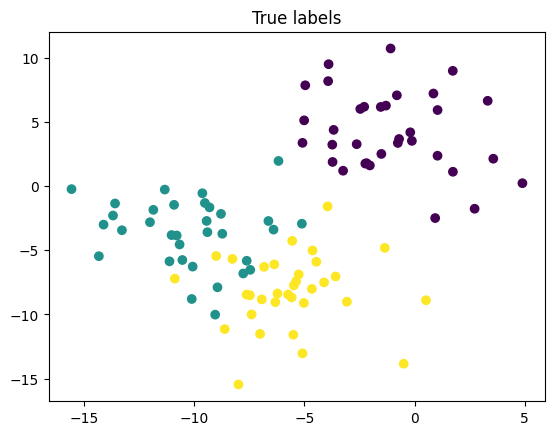

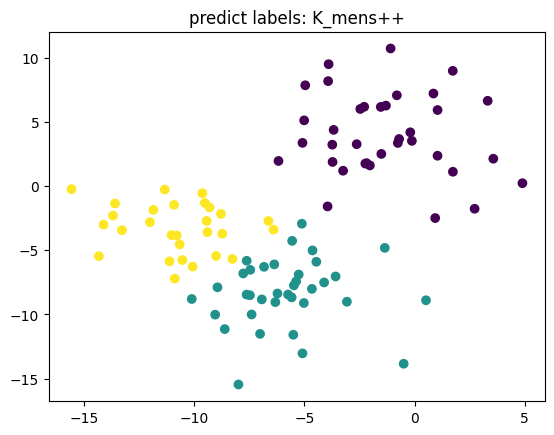

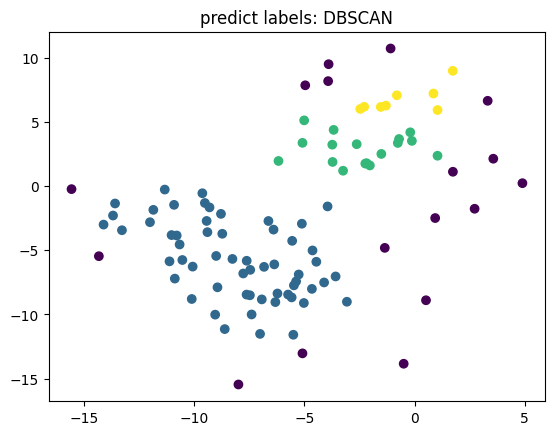

In [71]:
plt.subplot(1, 1, 1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('True labels')
plt.show()

plt.subplot(1, 1, 1)
plt.scatter(x[:, 0], x[:, 1], c=labels_Kmeans)
plt.title('predict labels: K_mens++')
plt.show()

plt.subplot(1, 1, 1)
plt.scatter(x[:, 0], x[:, 1], c=labels_pred)
plt.title('predict labels: DBSCAN')
plt.show()

In [77]:
score1 = metrics.adjusted_rand_score(labels_Kmeans, y)
print(score)

score2 = metrics.adjusted_mutual_info_score(labels_Kmeans, y)
print(score2)

scpre3 = metrics.fowlkes_mallows_score(labels_Kmeans, y)
print(scpre3)

score4 = metrics.silhouette_score(x, labels_Kmeans)
print(score4)

score5 = metrics.davies_bouldin_score(x, labels_Kmeans)
print(score5)

0.33043887639273944
0.6645225172012131
0.7932576766112255
0.48656559934483856
0.7004262199106522


In [61]:
#########################################################

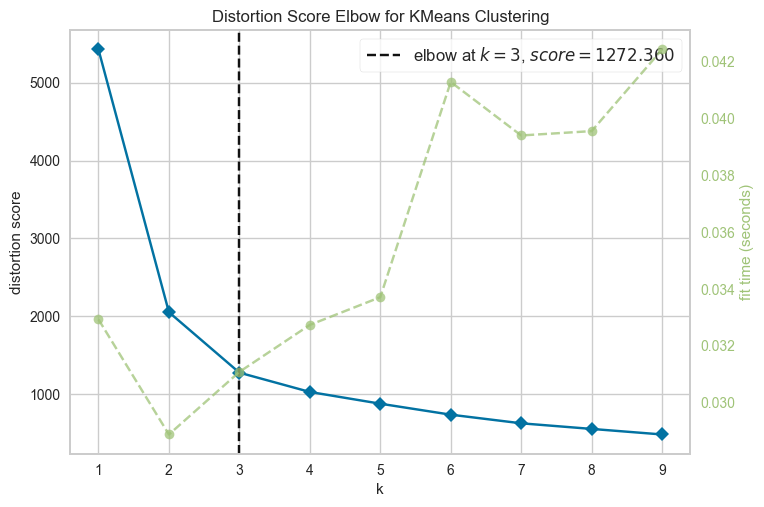

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10))

In [92]:
from yellowbrick.cluster import KElbowVisualizer, kelbow_visualizer
import warnings
warnings.filterwarnings('ignore')

kelbow_visualizer(KMeans(random_state=1), x, k=(1, 10), timing=False)

In [126]:
for min_samples in range(1, 10):
    
    dbscan = DBSCAN(eps=2.0, min_samples=min_samples) 
    labels = dbscan.fit_predict(x)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    score = adjusted_rand_score(labels, y)
    print('score', score)
    
    n_noise = list(labels).count(-1)
    print(f"min_samples = {min_samples}: Кластеров = {n_clusters}, Шумовых точек = {n_noise}")

score 0.3426491021334224
min_samples = 1: Кластеров = 15, Шумовых точек = 0
score 0.3388299823571541
min_samples = 2: Кластеров = 5, Шумовых точек = 10
score 0.3390842965035615
min_samples = 3: Кластеров = 4, Шумовых точек = 12
score 0.33043887639273944
min_samples = 4: Кластеров = 3, Шумовых точек = 17
score 0.32357242319546486
min_samples = 5: Кластеров = 3, Шумовых точек = 20
score 0.30933096638189284
min_samples = 6: Кластеров = 3, Шумовых точек = 24
score 0.2630791536457581
min_samples = 7: Кластеров = 2, Шумовых точек = 38
score 0.24720079837095407
min_samples = 8: Кластеров = 2, Шумовых точек = 41
score 0.1588136918589718
min_samples = 9: Кластеров = 2, Шумовых точек = 52


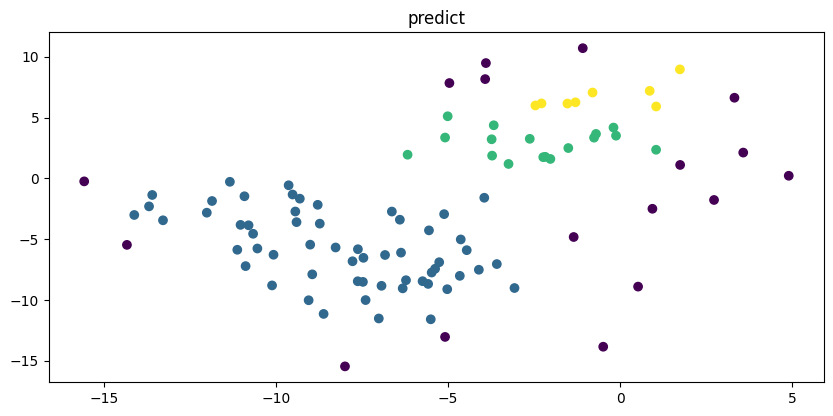

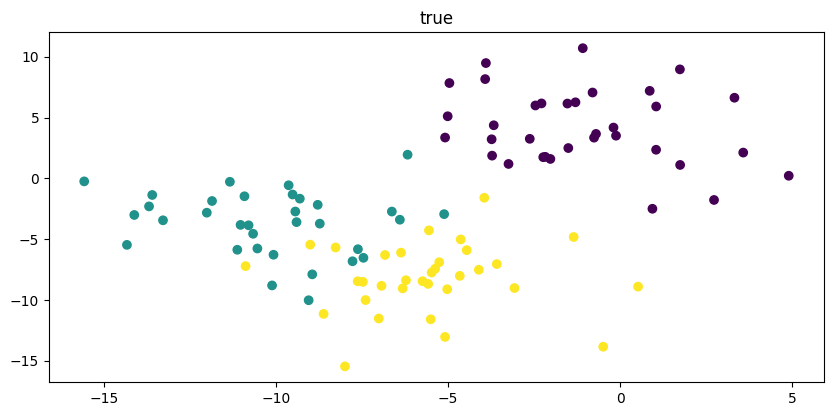

In [121]:

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(x[:, 0], x[:, 1], c=labels_pred)
plt.title('predict')
plt.show()


plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('true')
plt.show()

---------------

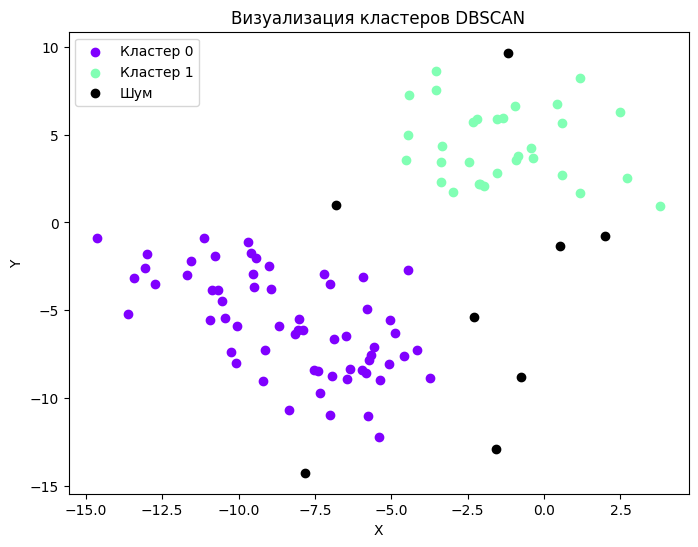

In [143]:
# Визуализация кластеров
plt.figure(figsize=(8, 6))
unique_labels = set(labels)


#Сопоставляем каждому кластеру свой цвет
for label in unique_labels:
    if label == -1:
        # Шумовые точки (черный цвет)
        color = "k"
        label_name = "Шум"
    else:
        # Уникальный цвет для каждого кластера
        color = plt.cm.rainbow(float(label) / (len(unique_labels) - 1))
        label_name = f"Кластер {label}"

    # Отображение точек соответствующего кластера
    cluster_points = x[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name)

# Настройка графика
plt.title("Визуализация кластеров DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


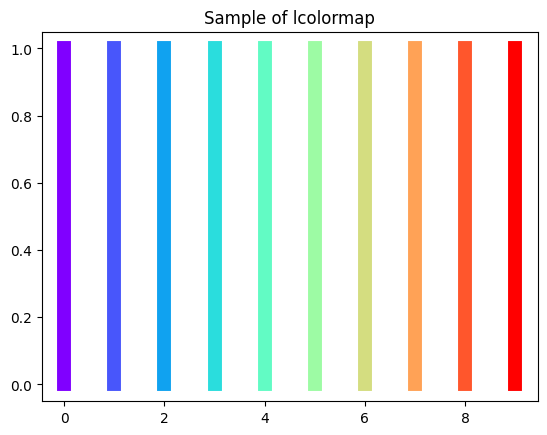

In [128]:
values = np.linspace(0, 1, 10)

colors = [plt.cm.rainbow(value) for value in values]

for i, color in enumerate(colors):
    plt.plot([i, i], [0, 1], c=color, linewidth=10)
plt.title('Sample of lcolormap')
plt.show()

-----

In [131]:
import numpy as np

def euclidean_distance(point1, point2):
    """Вычисление Евклидова расстояния между двумя точками"""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def get_neighbors(data, point_idx, eps):
    """Находит все соседние точки в пределах радиуса eps"""
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def dbscan(data, eps, min_pts):
    """
    Реализация алгоритма DBSCAN.
    Аргументы:
    - data: numpy-матрица данных (каждая строка — точка)
    - eps: радиус окрестности
    - min_pts: минимальное количество точек для формирования ядра
    
    Возвращает:
    - метки кластеров для каждой точки (-1 для шумовых точек)
    """
    labels = [-1] * len(data)  # Изначально все точки помечены как шумовые
    cluster_id = 0

    for point_idx in range(len(data)):
        if labels[point_idx] != -1:
            # Точка уже была обработана
            continue
        
        # Найти соседей текущей точки
        neighbors = get_neighbors(data, point_idx, eps)
        
        if len(neighbors) < min_pts:
            # Если недостаточно соседей, точка остается шумовой
            labels[point_idx] = -1
            continue
        
        # Создаем новый кластер
        cluster_id += 1
        labels[point_idx] = cluster_id
        
        # Расширяем кластер
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            
            if labels[neighbor_idx] == -1:
                # Шумовая точка становится частью кластера
                labels[neighbor_idx] = cluster_id
            
            elif labels[neighbor_idx] == 0:
                # Пограничная точка становится частью кластера
                labels[neighbor_idx] = cluster_id
                
                # Найти соседей этой точки, если она ядровая
                neighbor_neighbors = get_neighbors(data, neighbor_idx, eps)
                if len(neighbor_neighbors) >= min_pts:
                    neighbors += neighbor_neighbors  # Добавляем соседей в очередь
            
            i += 1
    
    return labels

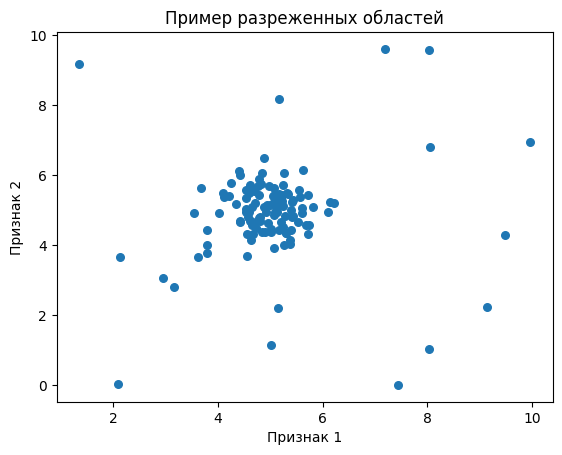

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация плотного кластера
dense_cluster = np.random.normal(loc=5, scale=0.5, size=(100, 2))

# Разреженные точки вокруг
sparse_area = np.random.uniform(low=0, high=10, size=(20, 2))

# Объединяем данные
data = np.vstack([dense_cluster, sparse_area])

# Визуализация
plt.scatter(data[:, 0], data[:, 1], s=30)
plt.title("Пример разреженных областей")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


In [112]:
print(np.std(data))

1.2698533021091212


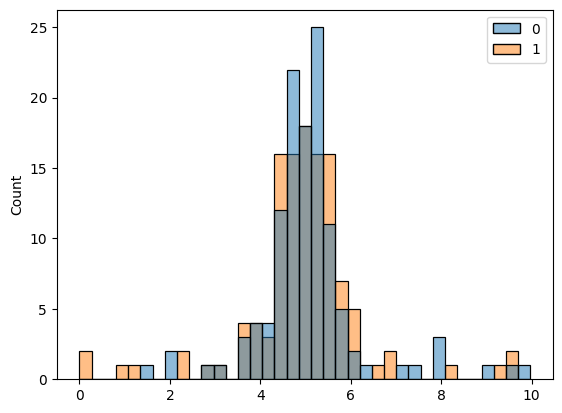

In [111]:
sns.histplot(data)
plt.show()

---------------------------

In [4]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt


x, y = load_diabetes(return_X_y=True)

n_feature = x.shape[1]

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Ваши данные
X = np.random.rand(100, 2)  # Пример данных

# Сетка параметров
param_grid = {
    'eps': np.linspace(0.1, 2.0, 10),  # диапазон eps
    'min_samples': range(3, 10)        # диапазон min_samples
}

# Перебор параметров
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = model.fit_predict(X)
    
    # Игнорируем случаи, где кластеризация неудачна (все точки - шум)
    if len(set(labels)) <= 1:
        continue
    
    # Оценка качества кластеризации (Silhouette Score)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params = params

print("Лучшие параметры:", best_params)
print("Лучший Silhouette Score:", best_score)


NameError: name 'np' is not defined